In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


## EDA ##

* Elegi las 10 monedas con mayor capitalizacion de mercado. 
* La capitalizacion de mercado de una criptomoneda, es el valor total del conjunto de criptomonedas de la moneda en cuestion, que se han minado o están en circulación. 
* Se utiliza en muchas plataformas y exchanges como criterio para clasificar a las criptomonedas, y ya que en estre proyecto estamos iniciando a nuestro cliente en el ambito de las criptomonedas, me parecio un parametro mas confiable para tener como referencia a la hora de elegir 10 criptomonedas. 


A su vez podemos clasificarlas en 3 tipos segun capitalizacion=
* Criptomonedas de gran capitalización (más de 10.000 millones de dólares)
* Criptomonedas de capitalización media (entre 1000 millones y 10 000 millones de dólares)
* Criptomonedas de baja capitalización (menos de 1000 millones de dólares)

Las monedas elegidas son todas de gran capitalizacion


### Capitalizacion de mercado 
Número total de monedas en circulación * su precio en ese momento

* Me conecto a la API coingecko y creo distintos CSV con la informacion que considero mas relevante.
* Para empezar el EDA primero me traigo el DF que cree que tiene las 10 monedas que elegi, y ademas tiene el id, el nombre, el ranking segun el market cap, el volumen total, el precio maximo en las ultimas 24 hs y el precio minimo en las ultimas 24 hs (como trae datos actuales la ultima vez que lo actualice fue el 21/08), cambio de precio en las ultimas 24 hs y porcentaje de cambio de precio, los valores historicos maximos y minimos y sus porcentajes y sus fechas.

In [2]:
top10= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\10cripto.csv')

In [3]:
top10

,id,name,current_price,market_cap,market_cap_rank,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date
0,bitcoin,Bitcoin,25934.000000,505170783253,1,12543220744,26183.000000,25575.000000,-122.311207,-0.46942,-1.874780e+09,-0.36975,69045.000000,-62.41306,2021-11-10T14:24:11.849Z,67.810000,38171.93830,2013-07-06T00:00:00.000Z
1,ethereum,Ethereum,1643.740000,197714649390,2,10421599453,1666.290000,1597.410000,-20.469917,-1.23001,-2.144793e+09,-1.07315,4878.260000,-66.28483,2021-11-10T14:24:19.604Z,0.432979,379760.08334,2015-10-20T00:00:00.000Z
2,tether,Tether,1.001000,82844515691,3,14974278845,1.004000,0.996619,0.001903,0.19043,5.031071e+07,0.06077,1.320000,-24.42770,2018-07-24T00:00:00.000Z,0.572521,74.64750,2015-03-02T00:00:00.000Z
3,binancecoin,BNB,214.770000,33088471047,4,819517650,216.380000,204.210000,5.620000,2.68699,9.025285e+08,2.80411,686.310000,-68.66399,2021-05-10T07:24:17.097Z,0.039818,540014.32955,2017-10-19T00:00:00.000Z
4,ripple,XRP,0.518919,27462950643,5,1087987220,0.522798,0.507130,0.000106,0.02043,6.952652e+07,0.25381,3.400000,-84.70593,2018-01-07T00:00:00.000Z,0.002686,19249.27011,2014-05-22T00:00:00.000Z
5,usd-coin,USD Coin,1.000000,25908990808,6,5571671979,1.005000,0.997146,0.000282,0.02817,-3.706807e+07,-0.14287,1.170000,-14.73916,2019-05-08T00:40:28.300Z,0.877647,13.92503,2023-03-11T08:02:13.981Z
6,staked-ether,Lido Staked Ether,1644.080000,13707984807,7,53210243,1667.910000,1601.730000,-20.800637,-1.24938,-9.496924e+07,-0.68804,4829.570000,-65.95673,2021-11-10T14:40:47.256Z,482.900000,240.47558,2020-12-22T04:08:21.854Z
7,cardano,Cardano,0.260013,9119958348,8,197614620,0.261076,0.250525,0.000246,0.09452,2.645265e+07,0.29090,3.090000,-91.56971,2021-09-02T06:00:10.474Z,0.019253,1251.67982,2020-03-13T02:22:55.044Z
8,dogecoin,Dogecoin,0.063289,8923960066,9,381482875,0.064087,0.060500,0.000255,0.40438,5.884730e+07,0.66381,0.731578,-91.33084,2021-05-08T05:08:23.458Z,0.000087,72879.21861,2015-05-06T00:00:00.000Z
9,solana,Solana,20.610000,8424042500,10,468560257,21.050000,19.660000,-0.373236,-1.77833,-1.301006e+08,-1.52091,259.960000,-92.06000,2021-11-06T21:54:35.825Z,0.500801,4021.54820,2020-05-11T19:35:23.449Z


In [4]:
#Miro el tipo de dato 
top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   name                              10 non-null     object 
 2   current_price                     10 non-null     float64
 3   market_cap                        10 non-null     int64  
 4   market_cap_rank                   10 non-null     int64  
 5   total_volume                      10 non-null     int64  
 6   high_24h                          10 non-null     float64
 7   low_24h                           10 non-null     float64
 8   price_change_24h                  10 non-null     float64
 9   price_change_percentage_24h       10 non-null     float64
 10  market_cap_change_24h             10 non-null     float64
 11  market_cap_change_percentage_24h  10 non-null     float64
 12  ath        

In [5]:
#transformo la fecha en datetime porque esta en str
top10['ath_date']= pd.to_datetime(top10['ath_date'])
top10['atl_date']=pd.to_datetime(top10['atl_date'])

In [6]:
# Con la funcion describe miro los valores mas relavantes, resumen de estadistica de cada columna
top10.describe()

,current_price,market_cap,market_cap_rank,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,ath,ath_change_percentage,atl,atl_change_percentage
count,10.000000,1.000000e+01,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2946.004322,9.123663e+10,5.50000,4.651914e+09,2975.748696,2900.082192,-15.833221,-0.130222,-3.174044e+08,0.027868,7970.881158,-66.215195,55.315579,105567.711604
std,8105.103844,1.566499e+11,3.02765,5.841175e+09,8182.667304,7993.992231,38.494632,1.234547,9.405012e+08,1.180583,21549.744399,27.284529,151.728563,191933.030743
min,0.063289,8.424042e+09,1.00000,5.321024e+07,0.064087,0.060500,-122.311207,-1.778330,-2.144793e+09,-1.520910,0.731578,-92.060000,0.000087,13.925030
25%,0.639189,1.026696e+10,3.25000,4.032522e+08,0.643099,0.629502,-15.445747,-1.039862,-1.213178e+08,-0.608467,1.762500,-89.674612,0.024394,493.276640
50%,10.805500,2.668597e+10,5.50000,9.537524e+08,11.027500,10.328573,0.000176,0.024300,-5.307710e+06,-0.041050,131.680000,-67.474410,0.466890,11635.409155
75%,1286.497500,7.040550e+10,7.75000,9.209118e+09,1303.812500,1249.110000,0.000275,0.166453,5.671315e+07,0.281627,3793.755000,-63.298977,0.801365,64202.398532
max,25934.000000,5.051708e+11,10.00000,1.497428e+10,26183.000000,25575.000000,5.620000,2.686990,9.025285e+08,2.804110,69045.000000,-14.739160,482.900000,540014.329550


De las 10 criptomonedas con mayor market_cap, puedo ver un promedio de precio de las mismas de 2900 usd, pero teniendo en cuenta la variacion de un valor minimo de 0.06 a 25934, es decir entre la que mas precio tiene actualmente y la que menos tiene una gran diferencia. 

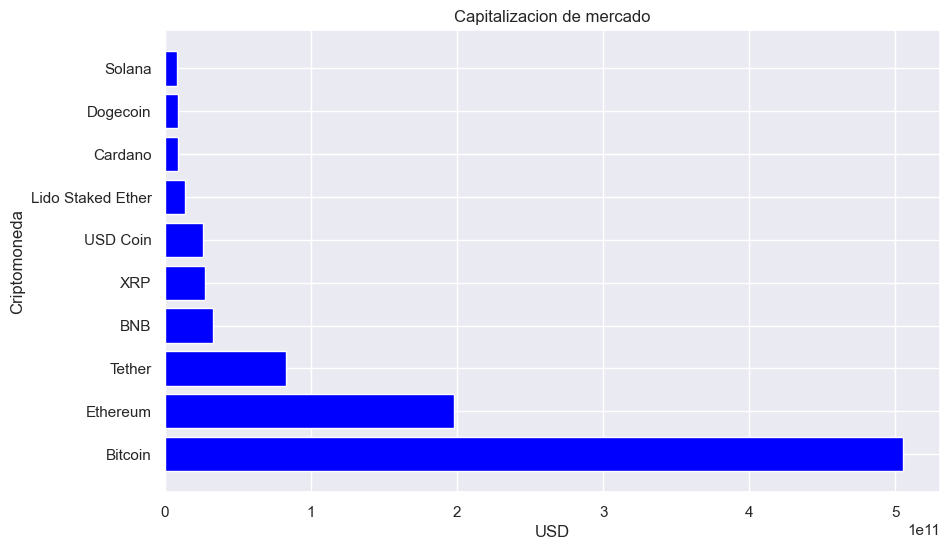

In [7]:
#Grafico las monedas y la capitalizacion de mercado
plt.figure(figsize=(10, 6))
plt.barh( top10['name'],top10['market_cap'], color='blue')
plt.xlabel('USD')
plt.ylabel('Criptomoneda')
plt.title('Capitalizacion de mercado')
plt.show()

### Precio actual 

! Aclaracion = Creo el csv conectandome a la api con fecha del 21 de agosto, que si me conectara en este momento me trae el precio actual, al dia y la hora que realizo la consulta

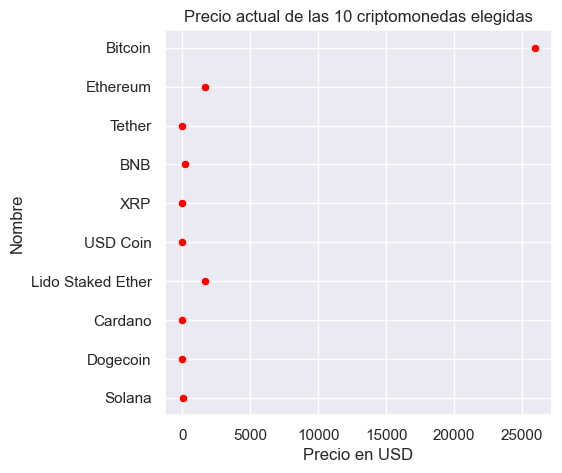

In [21]:

# Creo un scatterplot 
plt.figure(figsize=(5,5))
sns.scatterplot(data=top10, x='current_price',y='name', color='red')

# Personalizar el gráfico
plt.title('Precio actual de las 10 criptomonedas elegidas')
plt.xlabel('Precio en USD')
plt.ylabel('Nombre')

# Mostrar el gráfico
plt.show()

<Figure size 1000x1000 with 0 Axes>

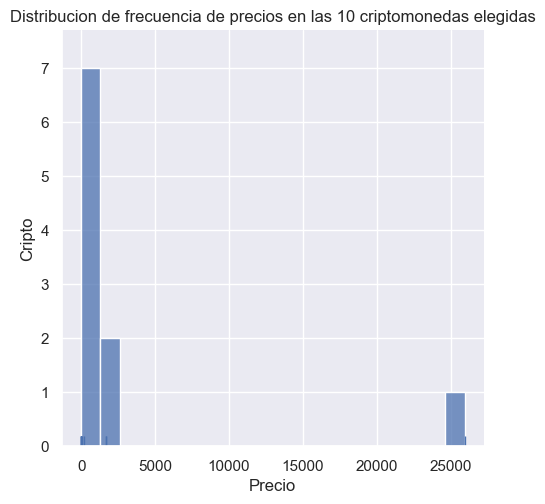

In [18]:
plt.figure(figsize=(10,10))
sns.displot(top10['current_price'], bins=20, rug = True)
plt.title('Distribucion de frecuencia de precios en las 10 criptomonedas elegidas')
plt.xlabel('Precio')
plt.ylabel('Cripto')
plt.show()

Con estos dos ultimos graficos podemos ver al diferencia entre el precio de bitcoin y del resto de las monedas, es bastante la diferencia, a pesar de que comparten el ranking de las 10 monedas con mas capitalizacion del mercado. 

### Precios maximos y minimos historicos

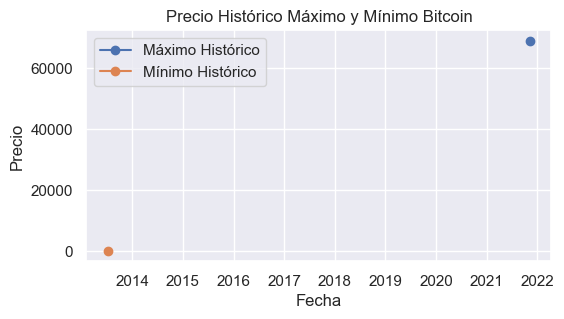

In [10]:
top10bit=top10[top10['name']=='Bitcoin']

plt.figure(figsize=(6, 3))
plt.plot(top10bit['ath_date'], top10bit['ath'], label='Máximo Histórico', marker='o')
plt.plot(top10bit['atl_date'], top10bit['atl'], label='Mínimo Histórico', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio Histórico Máximo y Mínimo Bitcoin')
plt.legend()
plt.grid(True)
plt.show()

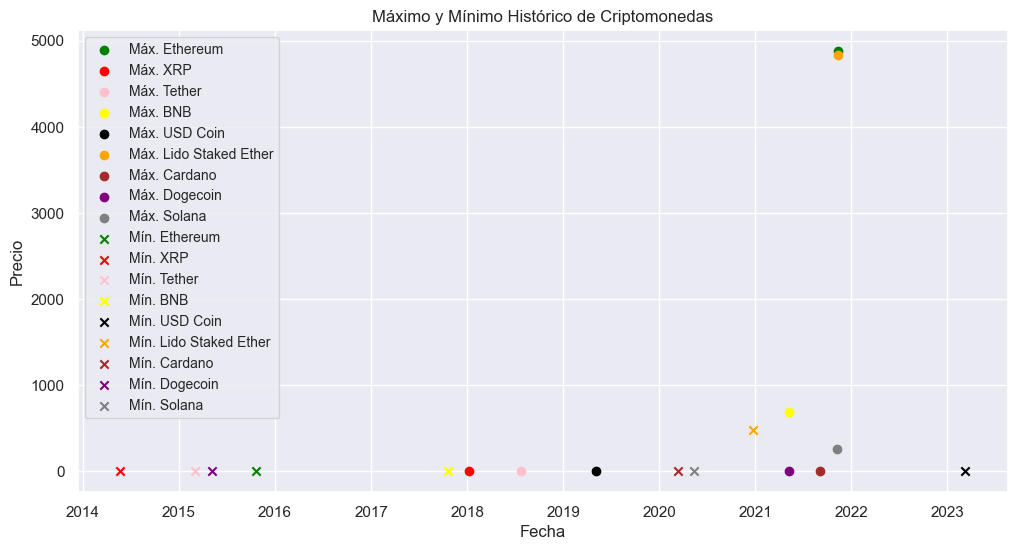

In [11]:
colores_criptos = {
    'Ethereum': 'green',
    'XRP': 'red',
    'Tether':'pink',
    'BNB':'yellow',
    'USD Coin': 'black',
    'Lido Staked Ether':'orange',
    'Cardano': 'brown',
    'Dogecoin':'purple',
    'Solana':'grey'
    # Agrega más criptomonedas y colores según sea necesario
}

plt.figure(figsize=(12, 6))

# Para cada criptomoneda, graficar el precio máximo histórico
for cripto, color in colores_criptos.items():
    data = top10[top10['name'] == cripto]
    plt.scatter(data['ath_date'], data['ath'], label=f'Máx. {cripto}', color=color, marker='o')

# Para cada criptomoneda, graficar el precio mínimo histórico
for cripto, color in colores_criptos.items():
    data = top10[top10['name'] == cripto]
    plt.scatter(data['atl_date'], data['atl'], label=f'Mín. {cripto}', color=color, marker='x')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Máximo y Mínimo Histórico de Criptomonedas')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

En estos dos grafico podemos ver los valores historicos maximos y minimos de cada moneda. Es notorio como si bien cada moneda tuvo sus valores minimos y maximos en distintos momentos a lo largo de los años 6 de ellas no superan los 100usd, BNB supera los 500usd y Ethereum y Lido Staked se acercan a los 5000 usd. 

* Se nota la diferencia de Bitcoin con el resto, y se nota como llega a su pico maximo cercano a los 70000 usd a fines del 2021. 




### Porcentaje de cambio de precio en 24 hs 

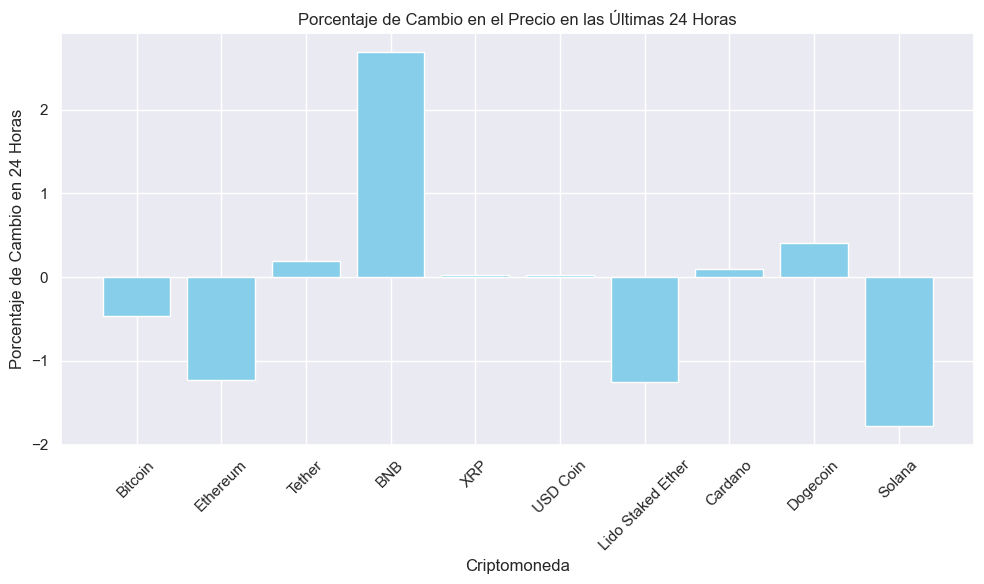

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(top10['name'], top10['price_change_percentage_24h'], color='skyblue')
plt.xlabel('Criptomoneda')
plt.ylabel('Porcentaje de Cambio en 24 Horas')
plt.title('Porcentaje de Cambio en el Precio en las Últimas 24 Horas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este grafico podemos ver el cambio de precio en 24 hs en porcentaje 